In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score  #Run cross-validation for single metric evaluation.
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

## 3. Feature engineering

In [2]:
def clean_data(df):
    
    df['Sex'] = (df['Sex'] == 'male').astype(int)
    
    df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    df['Fare'] = df.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))
    
    df.dropna(axis=0, subset=['Embarked'], inplace=True)
    
#     df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
    
    df.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)
    
    df.set_index('PassengerId')
#     df = df.merge(pd.get_dummies(df['Embarked']),left_index=True, right_index=True)
    return df

In [3]:

def standardize(X):
    return (X-X.mean())/X.std()

## 1. Get data

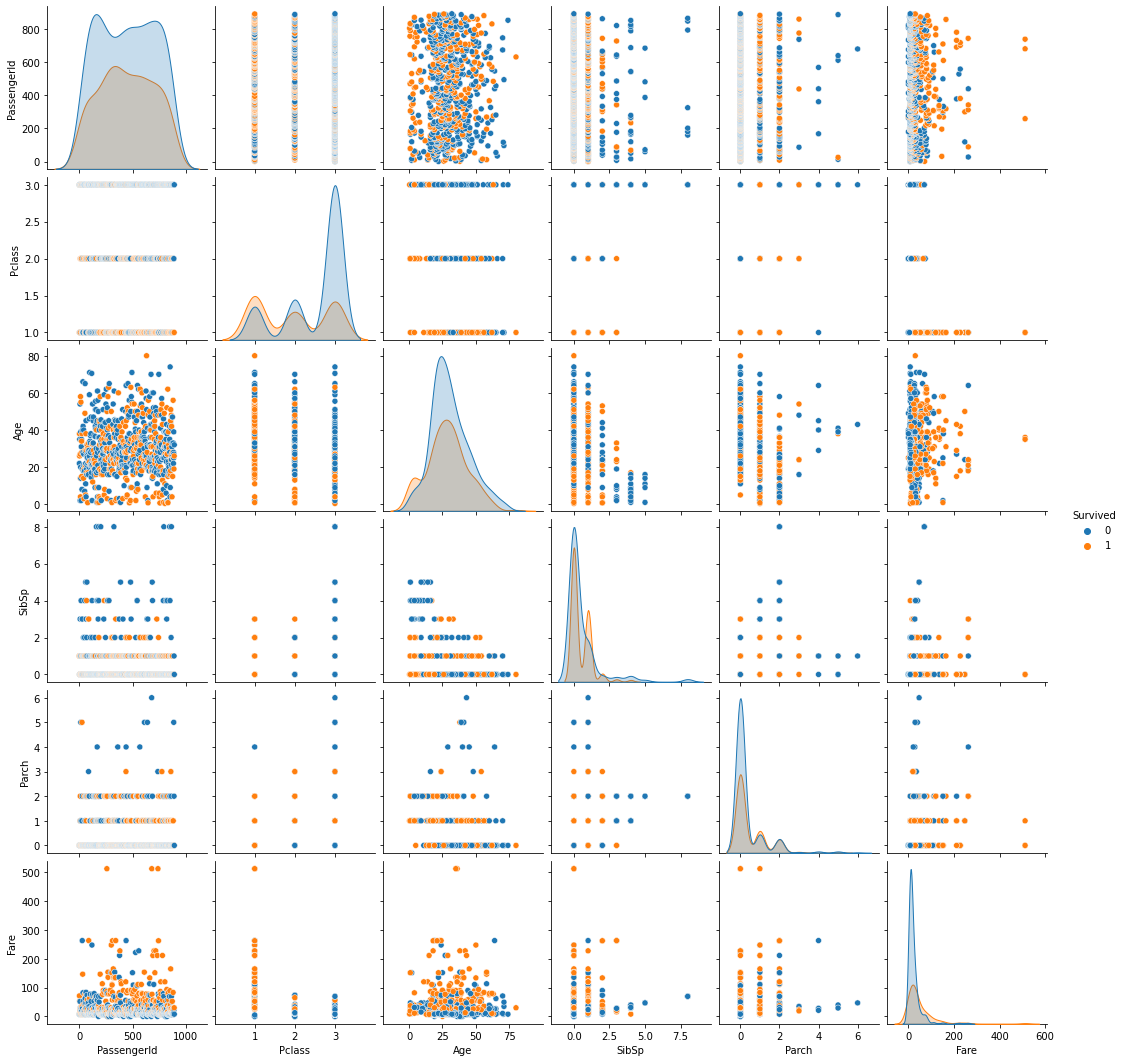

In [5]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

sns.pairplot(df_train, hue="Survived")


In [ ]:

df_train['Fare'] = standardize(df_train['Fare'])
df_test['Fare']  = standardize(df_test['Fare'])
df_train.head()



In [7]:
clean_train = clean_data(df_train)
clean_test = clean_data(df_test)

In [8]:
clean_test.info()
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 29.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp     

## 2. Train Test Split

In [9]:
y = df_train['Survived']
X = pd.get_dummies(df_train.drop('Survived', axis=1))
# X = pd.get_dummies(df_train)
# sns.pairplot(X, hue="Survived")


#Split model train test data
X_train, X_test_tem, y_train, y_test_tem = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test_tem.shape, y_train.shape, y_test_tem.shape



((711, 10), (178, 10), (711,), (178,))

## 3. Fit the Model

In [10]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test_tem)
    print('Accuracy: ',accuracy_score(y_test_tem, ypred))
    
    precision = precision_score(y_test_tem,ypred)
    recall = recall_score(y_test_tem,ypred)

    print('Precision: ',precision_score(y_test_tem,ypred), ' Recall: ', recall_score(y_test_tem,ypred))
    
    conf = confusion_matrix(y_test_tem,ypred)
    #plot the heatmap
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'Oranges')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    
    probs = model.predict_proba(X_test_tem) 
    fpr, tpr, threshold = roc_curve(y_test_tem, probs[:,1])
    
    # Calculating area under the curve
    auc_score = auc(fpr, tpr)
    print("Area under the curve = ",auc_score)

    plot_roc_curve(model, X_test_tem, y_test_tem)  
    plt.title("ROC Curve")

    plt.ylabel("TPR")
    plt.xlabel("FPR")
    plt.legend(loc="lower left")
    plt.ylim([0,1.00])
    
    # plot precision and recall curve 
    plot_precision_recall_curve(model, X_test_tem, y_test_tem)
    
    precisions, recalls, thresholds = precision_recall_curve(y_test_tem, probs[:,1])
    
    # compute area under precision recall curve 
    pr_area = auc(recalls, precisions)
    pr_area
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    plt.show()



Model  1 : LogisticRegression(random_state=42)
Accuracy:  0.797752808988764
Precision:  0.7391304347826086  Recall:  0.7391304347826086


/Users/stefan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


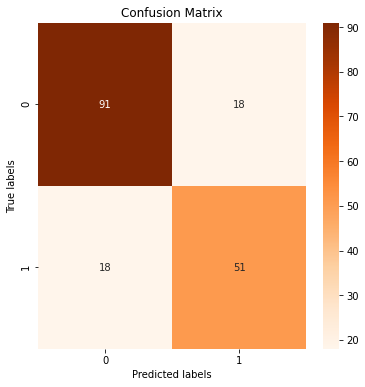

Area under the curve =  0.848823294774631


<ipython-input-10-36b760bc2387>:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


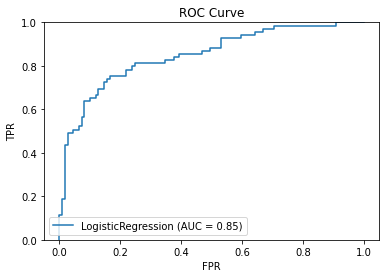

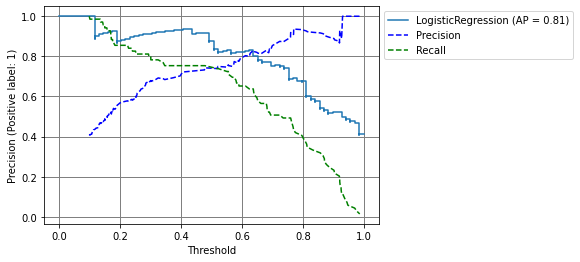

Model  2 : RandomForestClassifier()
Accuracy:  0.7865168539325843
Precision:  0.7246376811594203  Recall:  0.7246376811594203


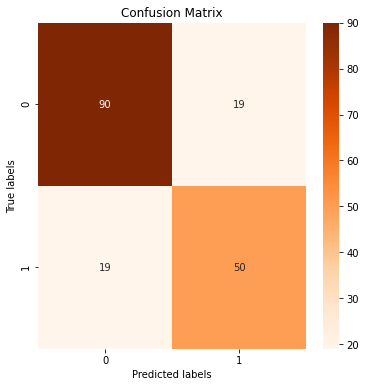

Area under the curve =  0.8430394894295972


<ipython-input-10-36b760bc2387>:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


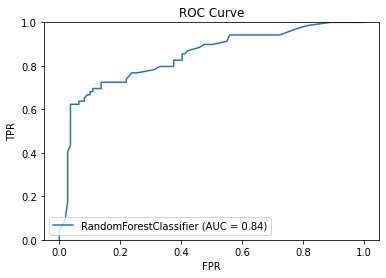

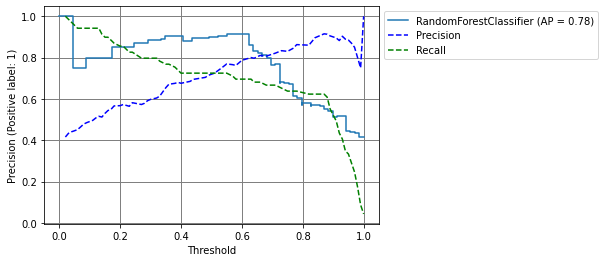

In [11]:
#Lets some models
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier()

models = [model1, model2]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    fitAndPredict(model)

Accuracy:  0.8033707865168539
Precision:  0.75  Recall:  0.7391304347826086


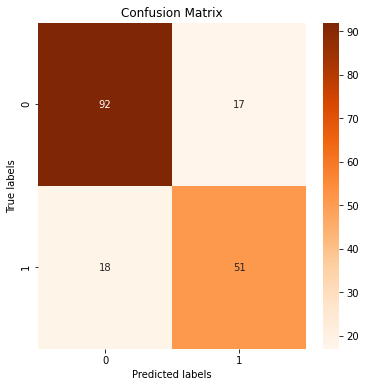

Area under the curve =  0.8429065283871825


<ipython-input-10-36b760bc2387>:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


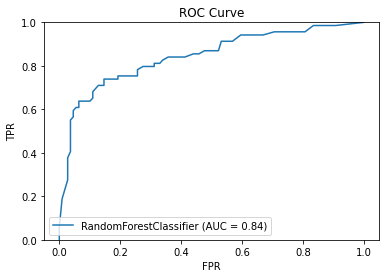

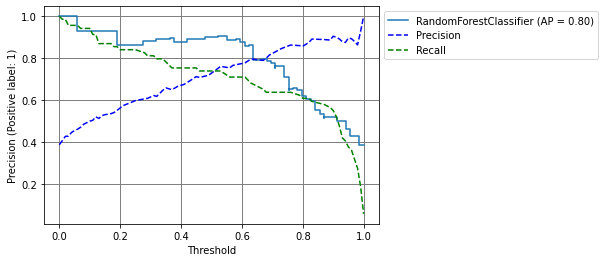

[0.81944444 0.88732394 0.78873239 0.88732394 0.81690141 0.85915493
 0.8028169  0.85915493 0.81690141 0.78873239]


In [12]:
model = RandomForestClassifier()
fitAndPredict(model)


cross_accuracy_log = cross_val_score(model,   # estimator: # the model you want to evaluate 
                      X_train,         # the training input data 
                      y_train,         # the training output data  
                      cv=10,          # number of cross validation datasets, k-folds 
                      scoring='accuracy'     # evaluation metric 
)

print(cross_accuracy_log)

In [13]:
predict = model.predict(pd.get_dummies(clean_test))

In [14]:
output = pd.DataFrame({'PassengerId': clean_test.PassengerId, 'Survived': predict})
output.to_csv('my_submission3.csv', index=False)
print("Submission saved")

Submission saved
